# Static Plots

1. This is (was?) the bread and butter of Python visualization
2. Understanding how to quickly and effectively make static plots from data is **very** useful
3. We're going to do this the *hard way* first, then see some tricks that make it a lot easier

**Packages:**

- `matplotlib`
- `pandas.plot`
- `seaborn`

## How we are going to learn this

This isn't about *learning* `matplotlib`, but learning how to use a visualization library. We are going to do a lot of:

- Examples
- Fumbling through the documentation
- Cheating with `Shift+Tab`
- More Examples

# Our Data

This is a good time to talk about our data. It's all in the `data` folder, but what is it like? Let's take a look.

In [3]:
import pandas as pd
DATA_FOLDER = "../../data"
df = pd.read_csv(f'{DATA_FOLDER}/google_search_trends/multiTimeline.csv')
df.head()

,Category: All categories
Month,Data science: (Worldwide)
2004-01,14
2004-02,14
2004-03,11
2004-04,11


## Clean it

- Need to skip the first row
- Months are dates!

In [4]:
df_ds = pd.read_csv(f'{DATA_FOLDER}/google_search_trends/multiTimeline.csv', skiprows=1,parse_dates=["Month"])
df_ds.head()

,Month,Data science: (Worldwide)
0,2004-01-01,14
1,2004-02-01,14
2,2004-03-01,11
3,2004-04-01,11
4,2004-05-01,9


# Matplotlib

https://matplotlib.org/tutorials/introductory/usage.html

> "`matplotlib` has an extensive codebase that can be daunting to many new users." - `matplotlib`user guide

There are a few key objects to think about when using `matplotlib`.

- Figure: this is the highest-level object, it holds everything together
- Axes: these are inside the figure and are used to plot points
- Various artists: inside the axes are lots of little things like points, symbols, lines, text, etc.

All of these are declared explicitly and are highly customizable. **Unfortunately**, there's almost no easy way to do anything that isn't easy.

[]

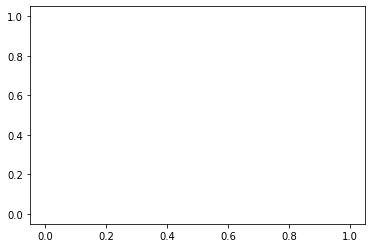

In [6]:
# Import 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

plt.plot() # take a look at the function

In [7]:
x = df_ds.Month.values
y = df_ds['Data science: (Worldwide)'].values
print(x[:10], y[:10])

['2004-01-01T00:00:00.000000000' '2004-02-01T00:00:00.000000000'
 '2004-03-01T00:00:00.000000000' '2004-04-01T00:00:00.000000000'
 '2004-05-01T00:00:00.000000000' '2004-06-01T00:00:00.000000000'
 '2004-07-01T00:00:00.000000000' '2004-08-01T00:00:00.000000000'
 '2004-09-01T00:00:00.000000000' '2004-10-01T00:00:00.000000000'] [14 14 11 11  9 10  8  8 12 10]


### The Default

What's the default though? Can we see that by looking at the function?

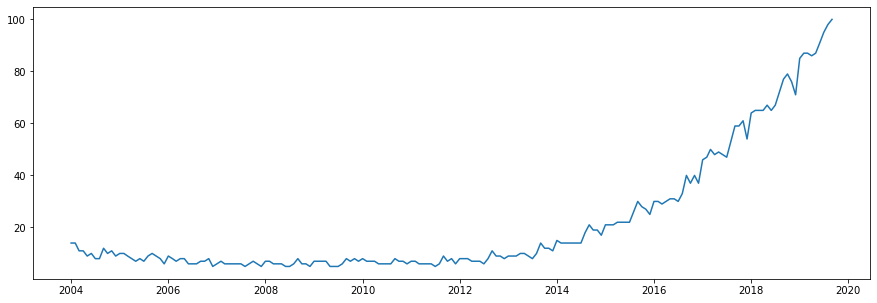

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x,y); # make the plot

# EXERCISE

- Change the colour and style of the line
- Add appropriate x and y-axis labels
- Add a plot title

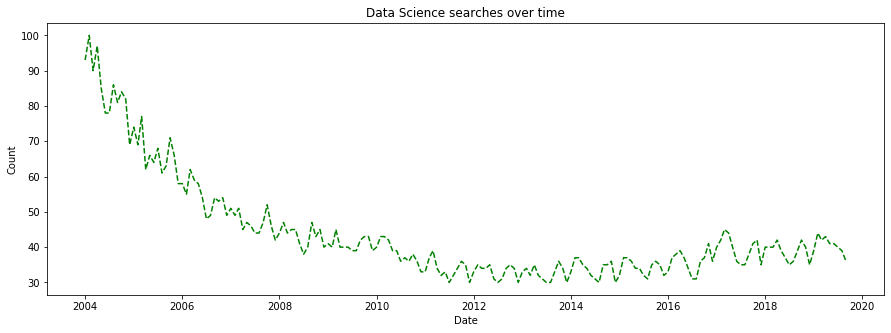

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x,y,"g--"); # plot the line
ax.set_xlabel('Date');
ax.set_ylabel('Count');
ax.set_title('Data Science searches over time');

In [41]:
# Write solution below here:

#fig, ax = plt.subplots()
#ax.plot(x,y); # plot the line

# EXERCISE

- Plot again with multiple google searches
    - Load the data from `../data/google_search_trends/datascience/multiTimeline-ai.csv`
    - And `../data/google_search_trends/datascience/multiTimeline-visualization.csv`
- Include a legend
    - Play around with the legend function to change it's location to the bottom right

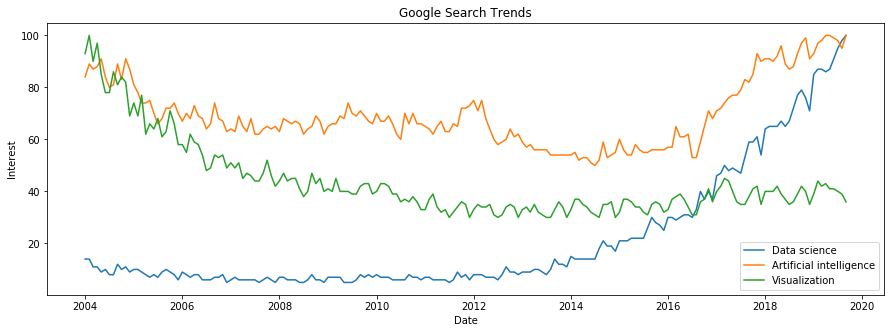

In [60]:
df_ai = pd.read_csv('../data/google_search_trends/multiTimeline-ai.csv', skiprows=1,parse_dates=["Month"])
df_viz = pd.read_csv('../data/google_search_trends/multiTimeline-visualization.csv', skiprows=1,parse_dates=["Month"])

fig, ax = plt.subplots(figsize=(15,5))
for df in [df_ds, df_ai, df_viz]:
    label = df.columns[-1].replace(": (Worldwide)","")
    x = df.Month
    y = df[df.columns[-1]].values
    ax.plot(x,y, label=label); # plot the line
ax.set_title("Google Search Trends");
ax.set_xlabel('Date');
ax.set_ylabel('Interest');
ax.legend(loc=4);

In [10]:
# Solution


# EXERCISE

- Plot again using subplots
    - One plot for each dataset
- This time include a figure suptitle

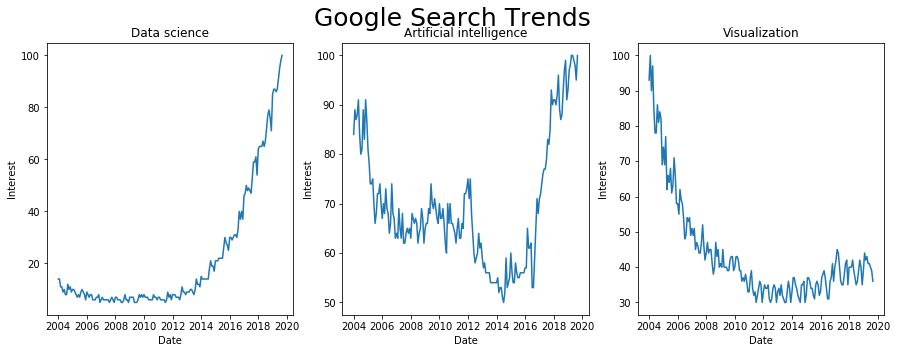

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle("Google Search Trends", fontsize=25)
for ax, df in zip(axes,[df_ds, df_ai, df_viz]):
    label = df.columns[-1].replace(": (Worldwide)","")
    x = df.Month
    y = df[df.columns[-1]].values
    ax.plot(x,y); # plot the line
    ax.set_title(label);
    ax.set_xlabel('Date');
    ax.set_ylabel('Interest');

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025041206860>,
      dtype=object)

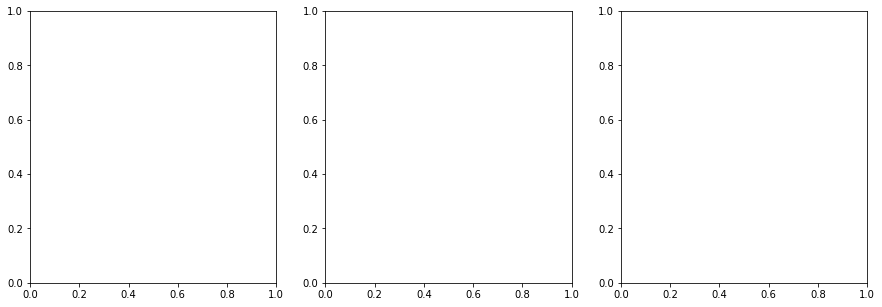

In [58]:
# Solution

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axes # HINT: look at this object

# Something more complicated?

This was easy, right? Let's build something that looks nice

(0.23992673992673996, 104.76007326007326)

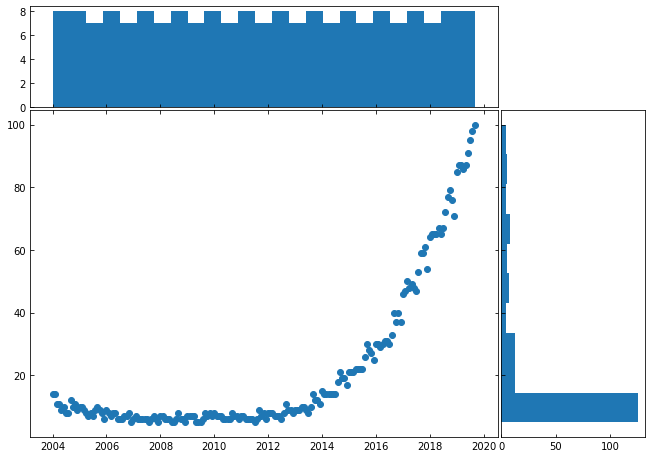

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(10, 7))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

ax_histx.hist(x, bins=25)
ax_histy.hist(y, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())


# Enough!

Now we understand how `matplotlib` functions. There are a lot of new syntax and commands to interact with the various objects that define the plot. Now let's try something more streamlined.